# **Introducción a las Redes Neuronales Artificiales**

El aprendizaje profundo es un conjunto de métodos de aprendizaje que intentan aproximar una función mediante el uso de arquitecturas complejas de redes neuronales artificiales (ANN, por sus siglas en inglés), donde ANN es una red interconectada de nodos inspirada en las redes neuronales biológicas. En la siguiente figura se aprecia una arquitectura para una ANN de una capa, y cuando se propaga hacia adelante una entrada $\mathbf{x} = (x_1, \dotso, x_n)$ resulta en una salida dada por la siguiente expresión:

\begin{equation}
    \hat{y} = \phi (\mathbf{x}^T \mathbf{w} + b) \; ,
\end{equation} donde $\hat{y}$ es la salida estimada en la propagación hacia adelante, $\phi$ es la función de activación, $\mathbf{w}= (w_{1},\dotso,w_{n})$ es el vector de pesos y $b$ es el sesgo de la neurona. Existen distintas funciones de activación, por nombrar algunas se tiene la identidad ($\phi(x) = x$), la unidad lineal rectificada (ReLU) que está dada por $\phi(x) = max(0,x)$ y la función sigmoide que puede ser expresada como $\phi(x) = \frac{1}{1 + e^{-x}}$.

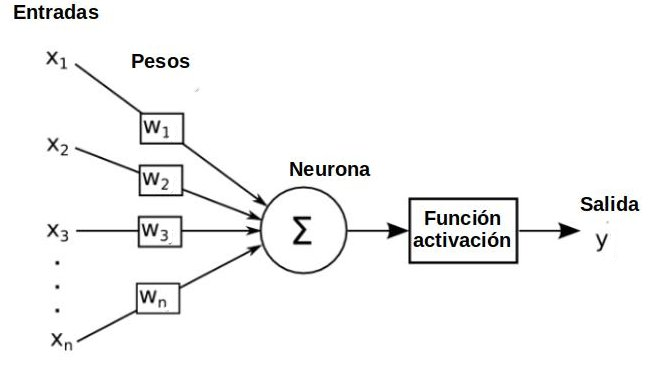

Para que este modelo de aprendizaje inspirado en la neurona aprenda es necesario optimizar sus pesos para distintas entradas, el optimizador más empleado es el descenso del gradiente. En el descenso del gradiente se utiliza como regla de actualización de pesos la siguiente ecuación, donde se revisa el caso en el que la función de activación es la identidad y la función de costo o pérdida $f$ a optimizar es el error cuadrático:

\begin{equation}
  \begin{aligned}
        \textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \eta \nabla f \\
           \textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \eta \frac{\partial  (y - \hat{y})^2}{\partial \textbf{w}^{(t)}} \\
       \textbf{w}^{(t+1)} = \textbf{w}^{(t)} + \eta (y - \hat{y}) \frac{\partial  \phi (\mathbf{x}^T \mathbf{w}^{(t)} + b)}{\partial \textbf{w}^{(t)}} \\
        \textbf{w}^{(t+1)} = \textbf{w}^{(t)} + \eta (y - \hat{y}) \textbf{x}\; ,
  \end{aligned}
\end{equation} donde $\eta$ es la tasa de aprendizaje, el cuál sería el hiperparámetro a regular del optimizador, $w$ tiene superíndices que indican la iteración a la que corresponde y $y$ es la salida objetivo. Cuando se tiene una ANN con muchas capas de neuronas intermedias entre la salida y la entrada se dice que se tiene una ANN profunda, en este tipo de redes el gradiente entre la entrada y salida no es inmediato ya que existen distintas capas intermedias, para obtener dicho gradiente es necesario aplicar la regla de la cadena sobre dichas capas intermedias.

# **Implementación de una ANN para resolver un problema de regresión lineal**

**Introducción**

Primero es necesario que se entienda el problema de regresión lineal y que mejor que con un ejemplo: Un investigador recolecta información mediante la realización de mediciones $y_1, y_2, y_3, \dots, y_m$ en los instantes $t_1, t_2, t_3, \dots, t_m$. Supóngase que grafica las tuplas $(t_i,y_i)$ como puntos en el plano. Al visualizar la distribución de los puntos en el plano, el investigador se plantea que existe una correlación lineal entre el tiempo y las mediciones, dada por la recta $y= ct + d$. Por lo que busca estimar los parámetros $c$ y $d$ que mejor ajusten la recta a los datos recopilados.

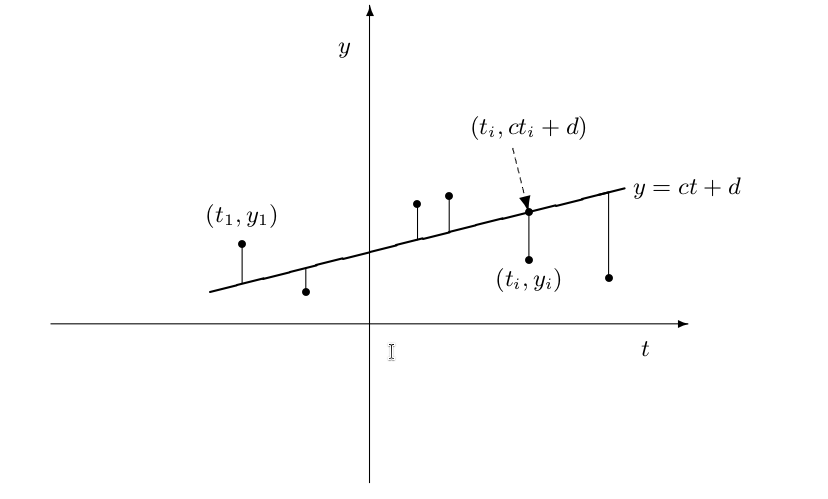

Para resolver el problema, primero para cada punto del plano se considera una ecuación parámetrizada por $c$ y $d$, a continuación se muestran dichas ecuaciones:

$$
\begin{cases}
t_1 c + d = y_1,\\
t_2 c + d = y_2,\\
\vdots  \\
t_m c + d = y_m
\end{cases}
$$

Después dichas ecuaciones se representan en su forma matricial:


$$  
\begin{bmatrix} t_1 & 1 \\
                    t_2 & 1 \\
                     \vdots & \vdots \\
                    t_m & 1
    \end{bmatrix}
    \begin {bmatrix}
                     c  \\
                     d  
    \end{bmatrix}
    =  \begin{bmatrix} y_1  \\
                    y_2  \\
                     \vdots  \\
                    y_m
    \end{bmatrix}
$$

Con dichas matrices se puede tener la siguiente expresión:

$$
    \mathbf{A} \mathbf{x} = \mathbf{y}
$$

Podemos modelar lo anterior con una ANN de una capa y dos neuronas, donde podemos tomar como entradas las filas de la matriz $\mathbf{A}$ y un vector $\mathbf{w} = [w_1,w_2]$ de pesos que aproximará a los parámetros $c$ y $d$. Teniendo a la salida de la red las predicciones para cada instante $\hat{y_1}, \hat{y_2}, \hat{y_3}, \dots, \hat{y_m}$. Se busca que el modelo de aprendizaje apróxime los parámetros optimizando el vector de pesos en la siguiente expresión:

$$
    \mathbf{A} \mathbf{w} = \mathbf{\hat{y}}
$$


**ANN para problema de regresión**

[link text](https://)

*   Primero generamos un conjunto de datos aleatorio para un problema de regresión lineal univariado



In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Cantidad de mediciones
M = 200

# univariado
n = 1

X, y = make_regression(n_samples=M, n_features=n, n_informative=n,
                             n_targets=1, random_state=42, noise=50)



* Dado que estamos construyendo un modelo de aprendizaje supervisado particionamos el conjunto de datos en conjunto de entrenamiento y conjunto de prueba.

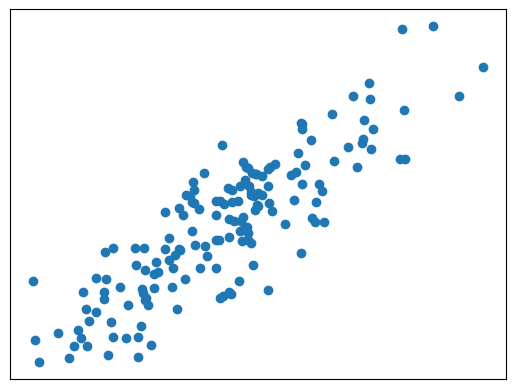

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Visualizamos el conjunto de entrenamiento en el plano

plt.scatter(x_train,y_train)
plt.xticks(())
plt.yticks(())

plt.show()

* Se define la entrada, la función que pondera las entradas por los pesos, se establecen las épocas y la tasa de aprendizaje como hiperparámetro del optimizador de descenso de gradiente.

In [ ]:
#Se construye la matriz A de nuestro problema de regresión agregando la columna de 1s
A = np.append(x_train, np.ones((x_train.shape[0],1)),axis=1)
#Función que realiza el producto punto entre las entradas y los pesos
f = lambda x, theta: x @ theta
#Vector de pesos
w = np.ones(x_train.shape[1] + 1)
#Núm. max de iteraciones
epocas = 100
# Tasa de aprendizaje
lr = 0.001


* A continuación se entrena el modelo de aprendizaje por 100 épocas donde calcula el error para cada entrada, Se utiliza como función de pérdida el error cuadrático y se grafica dicha función para todas las épocas.

<Figure size 640x480 with 0 Axes>

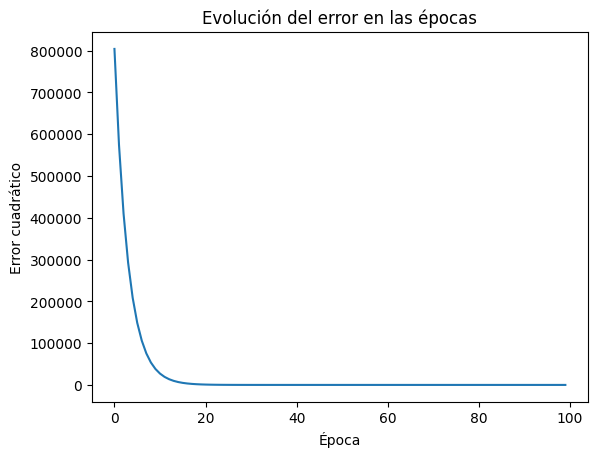

In [ ]:
#Detenerse
stop = False
t = 0
plt.figure()
#Evolución del error
error = []
while  t < epocas:
    #Guradamos el error
    epoch_error = 0
    for x,y in zip(A, y_train):
        #FORWARD
        #Calculamos la predicción
        pred = f(x,w)
        #BACKWATD
        #Obtenemos eror y - y^
        err = y - pred
        #Guardamos el error de la epoca
        epoch_error += err
        #Actualizamos los pesos
        w += lr*err*x
    #Guarda los errores
    error.append((epoch_error**2).sum())
    #Aumenta la época
    t += 1
plt.figure()
plt.plot(error)
plt.title('Evolución del error en las épocas')
plt.xlabel('Época')
plt.ylabel('Error cuadrático')
plt.show()

* Finalmente se hace la predicción para el conjunto de prueba con la ANN entrenada

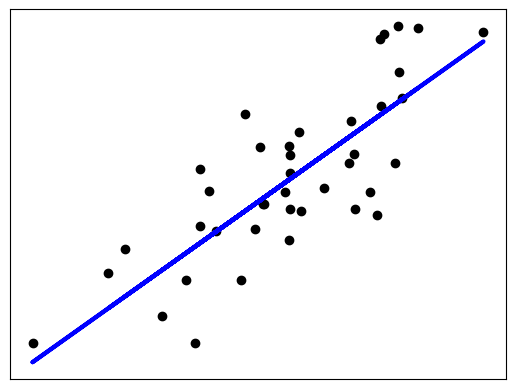

In [ ]:

#Procedemos a aplicar la ANN al testset
x_test_bias = np.append(x_test, np.ones((x_test.shape[0],1)),axis=1)
test_pred = [f(x,w) for x in x_test_bias]

plt.scatter(x_test, y_test, color="black")
plt.plot(x_test,test_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**Solución exacta del problema de regresión**

Si multiplicamos ambos lados de la ecuación $\mathbf{A} \mathbf{x} = \mathbf{y} $ por $\mathbf{A^T}$ entonces tenemos:

$$
    \mathbf{A}^T\mathbf{A} \mathbf{x} = \mathbf{A}^T\mathbf{y}
$$

Finalmente despejamos $\mathbf{x}$ quedandonos la siguiente expresión, la cual se conoce como la ecuación normal y permite obtener una solución exacta del problema de regresión.

$$
    \mathbf{x} = (\mathbf{A}^T\mathbf{A})^{-1}\mathbf{A}^T\mathbf{y}
$$

Ahora resolveremos el problema de regresión con la ecuación normal.

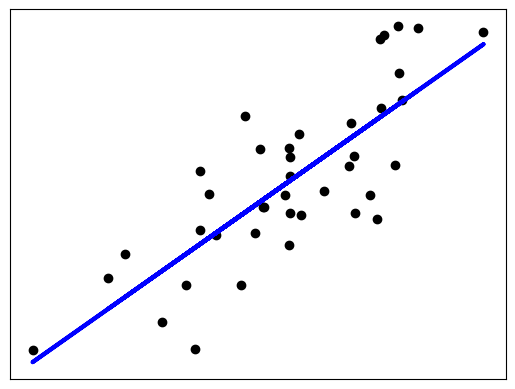

In [ ]:
# Obtenemos A para el conjunto de prueba
A = np.append(x_test, np.ones((x_test.shape[0],1)),axis=1)
# Evaluamos la ecuación normal para obtener x
x = np.linalg.inv(A.T @ A) @ A.T @ y_test

plt.scatter(x_test, y_test, color="black")
plt.plot(x_test,A @ x, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

El problema de regresión lineal asume una distribución normal, por lo tanto podemos ver las distribuciones parametrizadas de las soluciones y compararlas con la salida esperada.

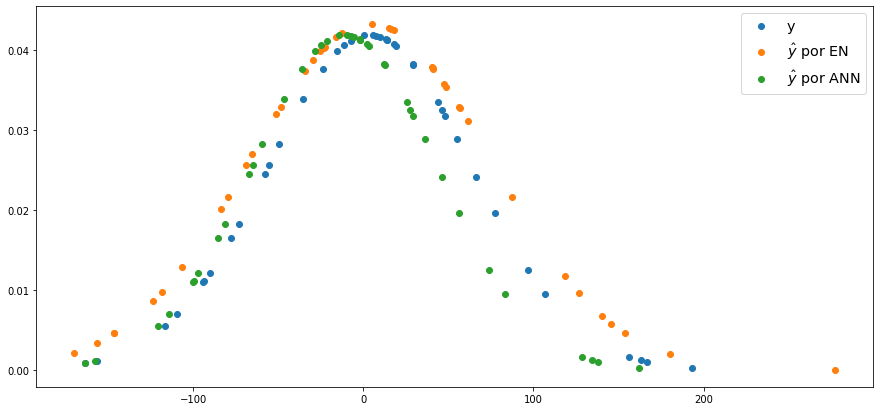

In [ ]:
#Media empírica de Y
mu = np.mean(y_test)
sigma = np.var(y_test)

#Distribución empírica de Y
a = (1./np.sqrt(sigma*2*np.pi))*np.exp(-(y_test-mu)**2/sigma)
#f(X)
y_hat = A @ x
#Media empírica de f(X)
mu_hat = np.mean(y_hat)
sigma_hat = np.var(y_hat)

#Distribución empírica de la ecuación normal
e = (1./np.sqrt(sigma_hat*2*np.pi))*np.exp(-(mu_hat-y_hat)**2/sigma_hat)

#Media empírica de f(X)
y_hat2 = A @ w
mu_hat = np.mean(y_hat2)
sigma_hat = np.var(y_hat2)

#Distribución empírica de las predicciones hechas por la ANN
e_ann = (1./np.sqrt(sigma_hat*2*np.pi))*np.exp(-(mu_hat-y_hat2)**2/sigma_hat)

plt.figure(figsize=(15,7))
#Visualización de distribuciones
plt.scatter(y_hat, e/e.sum(0), label="y")
plt.scatter(y_test, a/a.sum(0), label = "$\hat{y}$ por EN")
plt.scatter(y_hat2, e_ann/e_ann.sum(0), label = "$\hat{y}$ por ANN")
plt.legend(fontsize="x-large")
plt.show()

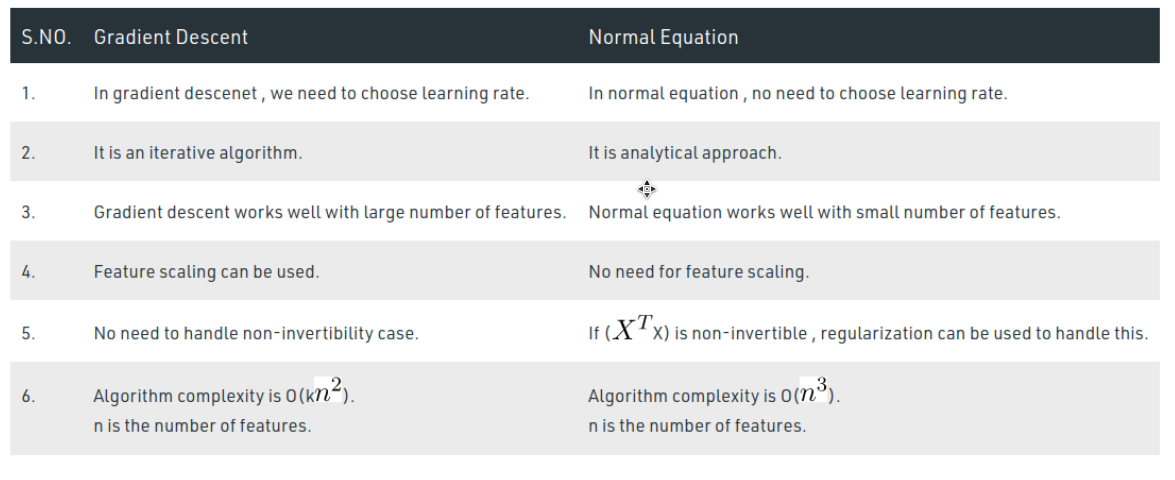

# **Introducción de las Redes Neuronales Artificiales para clasificación**

In [ ]:
import numpy as np

class Perceptron():

    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Weights: [-0.4  -0.68  1.82]


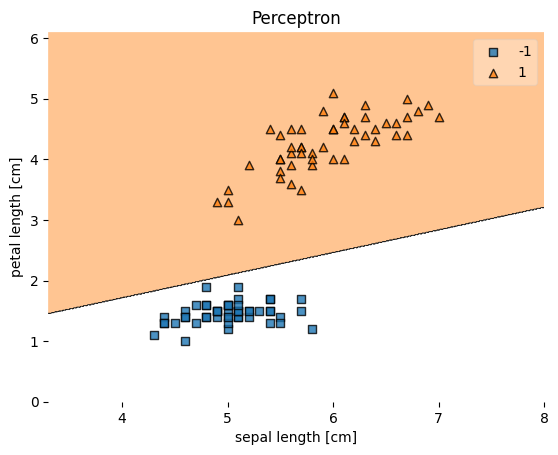

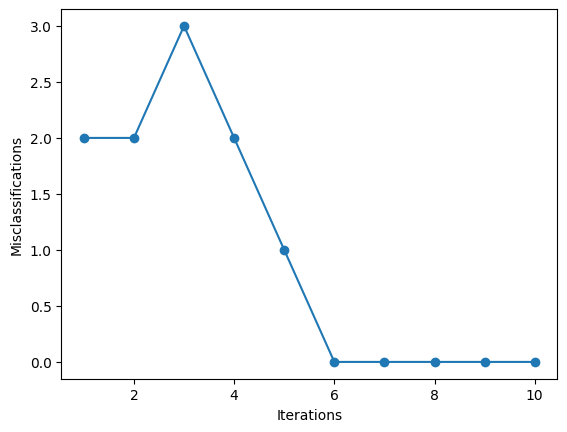

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(0.1, 10)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()
